<a href="https://colab.research.google.com/github/karthik12s/Character_Recognizer/blob/master/Letter%26Digit_recognizer_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Letter and Digit Recognizer**


Everyone of you are using Google Lens for converting image to text. But how does it convert the image to text??. The answer is the Google Vision API which is responsible for recognizing digits. 




The  Deep Learning algorithm below takes the image and identifies the character present in the image and prints it on the screen.

But Firstly, we need to load data to train the model


# I. Downloading Data

The cell below is used to mount the drive!!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


We have mounted Drive. Now its time to download the dataset from Kaggle.
This is the link to the [Dataset](https://www.kaggle.com/crawford/emnist).

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthik12s","key":"56a984ed14e695d673666653747fb61e"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Aug 11 03:19 kaggle.json


In [4]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [5]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List available datasets.
!kaggle datasets list 

ref                                                               title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
gpreda/covid19-tweets                                             COVID19 Tweets                                    16MB  2020-08-10 16:33:26           1070  
christianlillelund/passenger-list-for-the-estonia-ferry-disaster  The Estonia Disaster Passenger List               14KB  2020-07-26 15:40:17            267  
futurecorporation/epitope-prediction                              COVID-19/SARS B-cell Epitope Prediction            1MB  2020-07-24 02:53:28            239  
Cornell-University/arxiv                                          arXiv Dataset                                      2GB  2020-05-06 23:18:35           1095  
jeffreybraun/chipotle-locations               

In [7]:
!kaggle datasets download -d crawford/emnist

100% 1.24G/1.24G [00:15<00:00, 103MB/s] 



In [8]:
# Copy the stackoverflow data set locally.
#!kaggle competetions download -c state-farm-distracted-driver-detection

We have downloaded the data, now it's time to unzip it!!

In [9]:
!unzip \*.zip

Archive:  emnist.zip
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-train.csv  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-digits-test.csv  
  inflating: emnist-digits-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-mnist-train.csv  
  inflating: emnist_source_files/emnist-balanced-test-images-idx3-ubyte  
  inflating: emnist_source_files/emnist-balanced-test-labels-idx1-ubyte  
  inflating: emnist_source_files/emnist-balanced-train-images-idx3-ubyte  
  inflating: emnist_source_files/em

# II. Importing Modues and Data

We can train the model using the functions and algorithms present in the Tensorflow module. Tensorflow contains the a library called Keras which contains the functions of layers.

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
#Now we need to import the optimizer which is Adam for this case
from keras.optimizers import Adam

In [11]:
#Pandas module is used to extract the data present in the csv format.
import pandas as pd

In [12]:
#We use time module to know the time taken to run a particular cell or a block of code.
import time

In [13]:
#Numpy is gennerally used for array reshaping and manupulation.
import numpy as np

In [14]:
#glob module is used when we need to extract multiple files from a single folder.
import glob

In [15]:
#cv2 is an open sourse module used for extracting images and performing operations on them.
import cv2

In [54]:
#the pyplot present in matplotlib is used to plot the images.
import matplotlib.pyplot as plt
from IPython.display import Image
from keras.utils import plot_model

In [17]:
#The train test split function is used to split the given data into two sections.
from sklearn.model_selection import train_test_split

In [111]:
from termcolor import colored

Ok!.Till now we have imported all modules, now it's time to extract data. The data is in CSV format so we can import it using pandas.

In [18]:
#for importing training and test set of letters.
trl=pd.read_csv(r'/content/emnist-letters-train.csv')
tel=pd.read_csv(r'/content/emnist-letters-test.csv')

In [19]:
#for importing training and test set of digits.
trn=pd.read_csv(r'/content/emnist-digits-train.csv')
ten=pd.read_csv(r'/content/emnist-digits-test.csv')

Now lets see how training set of letters look like!!

In [20]:
tel.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
trl.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,0.010383,0.003198,0.000845,0.000428,0.000417,0.005113,0.009156,0.014392,0.017005,0.008187,0.003063,0.006701,0.005158,0.000315,0.000023,0.000011,0.0,0.0,0.0,0.0,0.000146,0.005394,0.032962,0.083481,0.162367,0.248550,0.310015,0.337864,0.340252,0.280656,...,0.244079,0.241467,0.214777,0.178752,0.159304,0.120384,0.080699,0.066994,0.043120,0.014268,0.000563,0.0,0.0,0.0,0.0,0.002016,0.007737,0.006160,0.000484,0.003435,0.000766,0.002838,0.000113,0.0,0.000034,0.000800,0.000777,0.000417,0.000101,0.000011,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,1.134288,0.442168,0.141301,0.073979,0.080469,0.585546,1.075630,1.483225,1.837844,1.017632,0.739508,1.159924,0.890498,0.067617,0.006712,0.003356,0.0,0.0,0.0,0.0,0.019277,0.304741,1.069662,1.844742,3.041025,4.132386,4.624732,4.648264,4.773676,4.239068,...,3.435135,3.322386,2.894163,2.429968,2.483356,2.125638,1.515276,1.490967,1.245944,0.613031,0.049088,0.0,0.0,0.0,0.0,0.516694,1.220705,1.062177,0.091840,0.639703,0.120714,0.738580,0.025557,0.0,0.010067,0.168626,0.164159,0.124165,0.030202,0.003356,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

# III.Data Manipulation

The dataset we have imported doesnot have column names. So we need to give the column names

In [22]:
col=['Digit']
for i in range(784):
    col.append(str(i))
trn.columns=col
ten.columns=col

In [23]:
col=['Alphabets']
for i in range(784):
    col.append(str(i))
trl.columns=col
tel.columns=col

We have taken the model output as 1-27 for A-Z and 28-37 for 0-10. So we need to add 27 to all digits so that the output will be in range of 0-10.

In [24]:
digits_column=list(trn['Digit'])
for i in range(len(digits_column)):
    digits_column[i]=int(digits_column[i])+27
trn['Digit']=digits_column

In [25]:
#digits_column
trn['Digit']

0         36
1         33
2         30
3         33
4         33
          ..
239994    31
239995    29
239996    28
239997    28
239998    27
Name: Digit, Length: 239999, dtype: int64

In [26]:
x_trn=trn.iloc[:,1:785]
y_trn=trn.iloc[:,0]
x_ten=ten.iloc[:,0:784]

In [27]:
x_trl=trl.iloc[:,1:785]
y_trl=trl.iloc[:,0]
x_tel=tel.iloc[:,0:784]

In [28]:
x_trl1=x_trl
x_trl1=np.array(x_trl1)
print(np.shape(x_trl1))
x_trl1=list(x_trl1)
print(len(x_trl1))
y_trl1=y_trl
y_trl1=np.array(y_trl1)
print(np.shape(y_trl1))
y_trl1=list(y_trl1)
len(y_trl1)

(88799, 784)
88799
(88799,)


88799

In [29]:
x_tel1=x_tel
x_tel1=np.array(x_tel1)
print(np.shape(x_tel1))
x_tel1=list(x_tel1)
print(len(x_tel1))

(14799, 784)
14799


In [30]:
x_trn1=x_trn
x_trn1=np.array(x_trn1)
print(np.shape(x_trn1))
x_trn1=list(x_trn1)
print(len(x_trn1))
y_trn1=y_trn
y_trn1=np.array(y_trn1)
print(np.shape(y_trn1))
y_trn1=list(y_trn1)
len(y_trn1)

(239999, 784)
239999
(239999,)


239999

In [31]:
x_ten1=x_ten
x_ten1=np.array(x_ten1)
print(np.shape(x_ten1))
x_ten1=list(x_ten1)
print(len(x_ten1))


(39999, 784)
39999


We have converted all the values of Alphabets and Digits to arrays. Now it's time to combine them.

In [32]:
#combining training sets
for i in range(len(y_trl1)):
    x_trn1.append(x_trl1[i])
    y_trn1.append(y_trl1[i])

In [33]:
#combining test sets
for i in range(len(x_tel1)):
    x_ten1.append(x_tel1[i])

In [34]:
#converting resultant lists to arrays
x_trn1=np.array(x_trn1)
y_trn1=np.array(y_trn1)

In [35]:
x_ten1=np.array(x_ten1)

In [36]:
x_tr=x_trn1
y_tr=y_trn1

In [37]:
x_te=x_ten1

In [38]:
np.shape(x_tr)

(328798, 784)

In [39]:
np.shape(x_tr[0])

(784,)

Here the data is in 1 Dimension, we need to convert it to 2 Dimensions. So the array of 784 is now converted to 28X28 array.

In [40]:
a=[]
for i in range(len(x_tr)):
  a.append(x_tr[i].reshape(28,28))

In [41]:
x_tr=np.array(a)

In [42]:
x_tr=x_tr.reshape(328798,28,28,1)

In [43]:
a=[]
for i in range(len(x_te)):
  a.append(x_te[i].reshape(28,28))

In [44]:
x_te=np.array(a)
x_te=x_te.reshape(x_te.shape[0],28,28,1)

In [45]:
np.shape(a)

(54798, 28, 28)

In [46]:
np.shape(x_tr[0])

(28, 28, 1)

In [47]:
del a

In [48]:
del x_tel1,x_trl1,x_trn,x_trn1,x_trl,x_tel,x_ten,x_ten1

In [49]:
#splitting the dataset to train and validation set.
x_train,x_valid,y_train,y_valid=train_test_split(x_tr,y_tr,test_size=0.2,random_state=0)

In [50]:
np.shape(x_valid)

(65760, 28, 28, 1)

# IV.Model creation and Training

We have transormed data now its time to create a model!!
We are using a sequential model which consists of convolutional layers and maxpooling layers. The dropout regularization is also used in between the layes.

In [51]:
model=keras.models.Sequential()
model.add(Conv2D(32,kernel_size=3,strides=1,padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=3,strides=1,padding='same',input_shape=(28,28)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=3,strides=1,padding='same',input_shape=(28,28)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(37,activation='softmax'))

Wow!! we have build the model and now its time to visualize it. The cellbeow shows the architecture of the model.

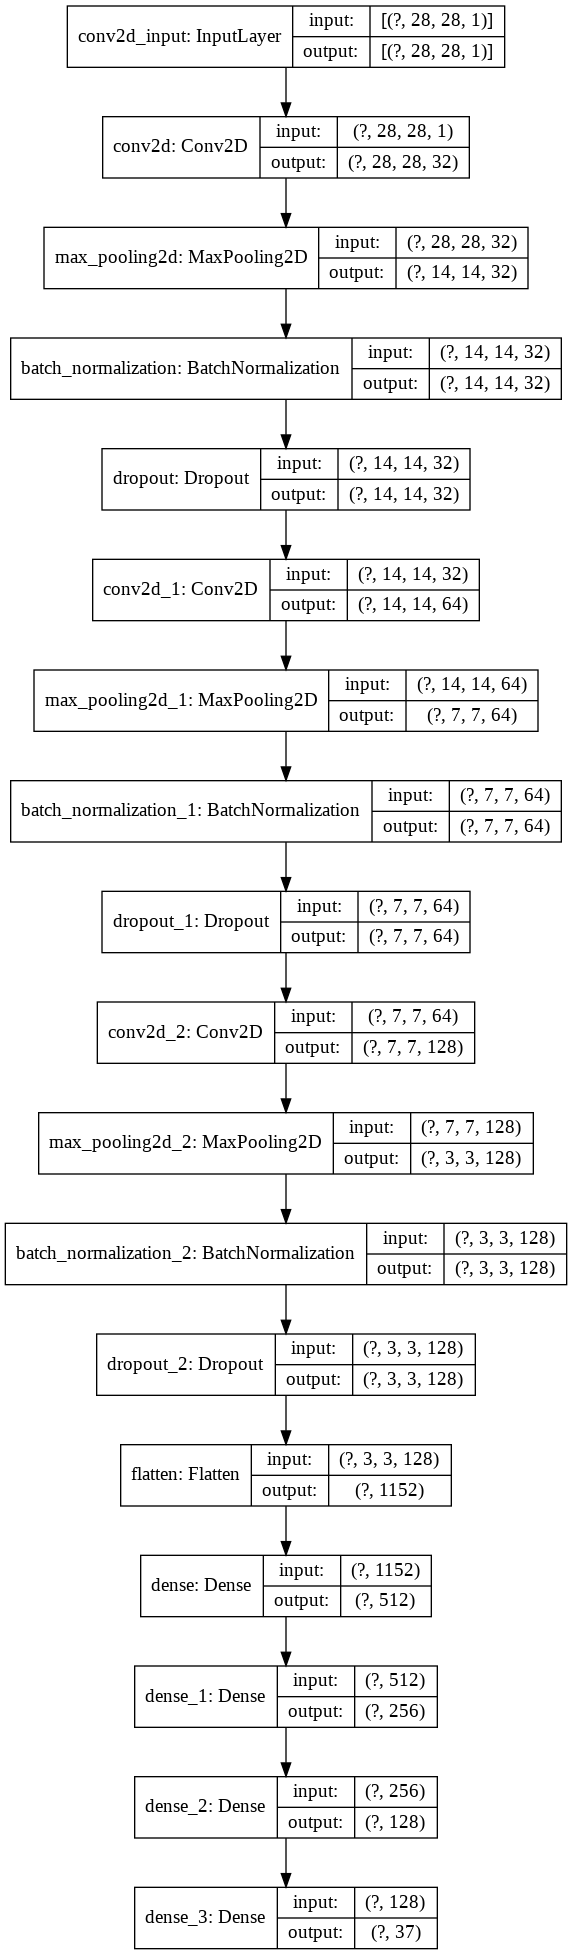

In [55]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

We have visualised model. Now lets see the parameters present in each layer.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

WoW!! We have 852k parameters to train.

Generally, we use checkpoints in training to save the model and here we using this checkpoint to save the best model.

In [56]:
checkpoint=keras.callbacks.ModelCheckpoint('Letter&Digit_recognizer1.h5',save_best_only=True)

We have created the model now its time to compile it.

In [57]:
opt=Adam(lr=0.0003)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

We are training the model for 10 epochs.

In [58]:
model_hist=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=10,callbacks=[checkpoint])

Epoch 1/10
8220/8220 [==============================] - 34s 4ms/step - loss: 0.3586 - accuracy: 0.8930 - val_loss: 0.2403 - val_accuracy: 0.9263
Epoch 2/10
8220/8220 [==============================] - 33s 4ms/step - loss: 0.2363 - accuracy: 0.9263 - val_loss: 0.2278 - val_accuracy: 0.9306
Epoch 3/10
8220/8220 [==============================] - 33s 4ms/step - loss: 0.2099 - accuracy: 0.9331 - val_loss: 0.2053 - val_accuracy: 0.9356
Epoch 4/10
8220/8220 [==============================] - 33s 4ms/step - loss: 0.1948 - accuracy: 0.9371 - val_loss: 0.2008 - val_accuracy: 0.9380
Epoch 5/10
8220/8220 [==============================] - 33s 4ms/step - loss: 0.1829 - accuracy: 0.9408 - val_loss: 0.1984 - val_accuracy: 0.9396
Epoch 6/10
8220/8220 [==============================] - 34s 4ms/step - loss: 0.1754 - accuracy: 0.9428 - val_loss: 0.2058 - val_accuracy: 0.9387
Epoch 7/10
8220/8220 [==============================] - 33s 4ms/step - loss: 0.1682 - accuracy: 0.9442 - val_loss: 0.2068 - val_ac

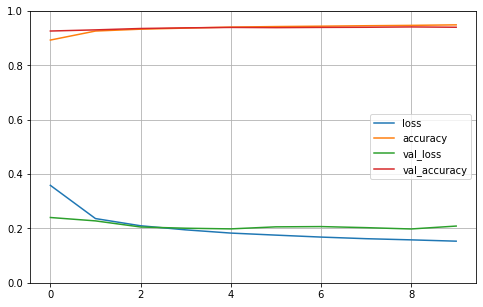

In [59]:
import matplotlib.pyplot as plt
pd.DataFrame(model_hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# V. Model Prediction on Test Set.

Previously, we have saved the model. Now its time to load it.

In [65]:
model=keras.models.load_model('/content/Letter&Digit_recognizer1.h5')

Now we need to predict output on the test set inputs.

In [66]:
pred=model.predict(x_te)

In [67]:
lis=[0,'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',0,1,2,3,4,5,6,7,8,9]

We have predicted the output but havent visualized them. The cell below randomly chooses 20 images from test set and plot the images and prints the corresponding outputs.

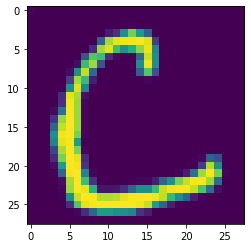


The character is: c





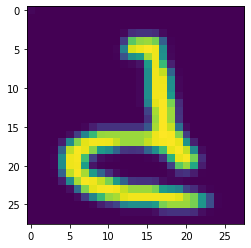


The character is: d





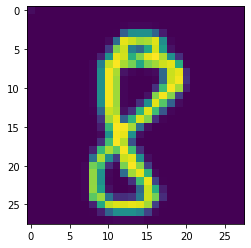


The character is: 8





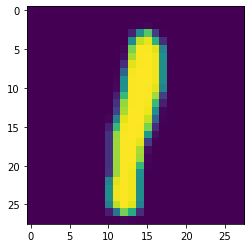


The character is: 1





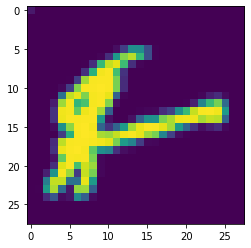


The character is: f





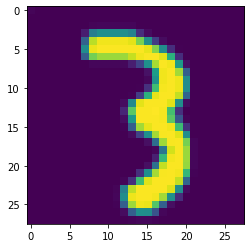


The character is: 3





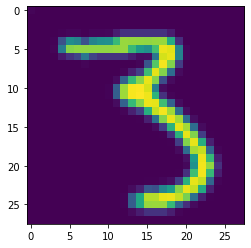


The character is: 3





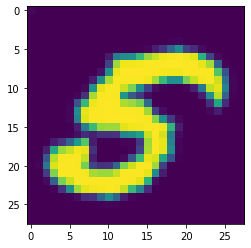


The character is: 5





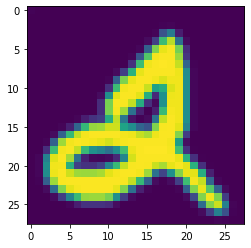


The character is: 2





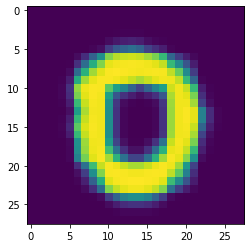


The character is: 0





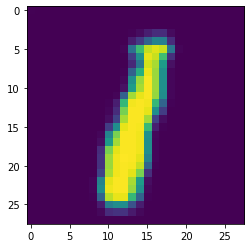


The character is: 1





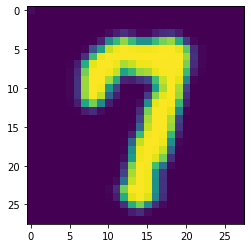


The character is: 7





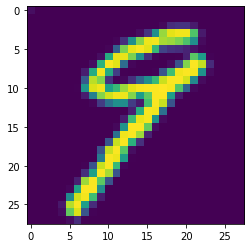


The character is: 9





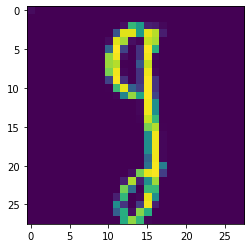


The character is: 9





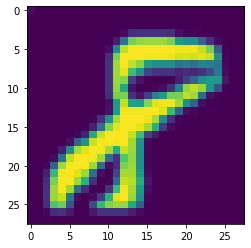


The character is: 8





In [121]:
for i in range(15):
    t=int((1-np.random.rand())*54727)
    fir=x_te[t]
    fir=fir.reshape(28,28)
    fir=fir.T
    plt.imshow(fir)
    plt.show()
    p=list(pred[t].round(2))
    print()
    print(colored('The character is:','yellow'),colored(lis[p.index(max(p))],'yellow'))
    print()
    print()
    print()
    time.sleep(1.5)
    plt.close()
#plt.imshow()

#VI. Model Prediction on Real time Data.

We have predicted outputs on test set images.But now its time to predict on real time data. Lets see the predictions of images drawn in paint.

In [101]:
#the number folder contains all the images and we are extracting them using glob function.
path=glob.glob('/content/drive/My Drive/numbers/*.PNG')

In [103]:
images=[]
for i in path:
    image=cv2.imread(i,0)
    image=~image
    image=cv2.resize(image,(28,28))
    image=np.array(image)
    image=image.T
    image=image.reshape(28,28,1)
    images.append(image)

In [104]:
images=np.array(images)
predicted_letters=model.predict(images)
predicted_letters=predicted_letters.round(2)

In [105]:
letter_names=[]
predicted_letters=list(predicted_letters)
for i in range(len(predicted_letters)):
    predicted_letters[i]=list(predicted_letters[i])
    letter_names.append(lis[predicted_letters[i].index(max(predicted_letters[i]))])

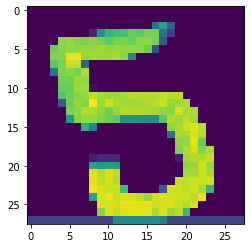

In [106]:
plt.imshow(images[10].reshape(28,28).T)

In [107]:
letter_names

[7, 5, 4, 1, 6, 0, 9, 3, 2, 2, 5, 2, 6, 0]